## 期中大作业

### 前期准备
为了实现数据读取和可视化，请安装下列Python扩展包
```bash
pip install pyvista
pip install panel
conda install -c conda-forge -y jupyter_bokeh #安装包的第二种方法, conda
pip install xlwings
```

### 大作业简介
美国在Permin Basin开展了两次压裂矿场实验HFTS1 和 HFTS2，本次大作业将基于课程学习的Python编程知识和HFTS1项目的现场实测数据，对井眼轨迹、完井及微地震数据进行数据处理和可视化。期中包括[`MicroseismicEvents.xlsx`](datasets/MicroseismicEvents.xlsx)和[`WellData.xlsx`](datasets/WellData.xlsx)。[`WellData.xlsx`](datasets/WellData.xlsx)包含井眼轨迹、压裂级数、簇数信息。[`MicroseismicEvents.xlsx`](datasets/MicroseismicEvents.xlsx) 包含对应每簇压裂施工过程中的微地震监测数据。

请仔细阅读和理解这两个现场实测数据的格式，根据个人理解和google搜索，参考名词解释如下：



这次中期大作业包含以下三个任务：

### 任务1
* 检索阅读HFTS相关论文, 总结HFTS项目基础信息（油藏、地质）
* 总结HFTS在裂缝监测方面的成果（比如microsesmic, fiber optics等）

### 任务2
* 阅读和理解井眼轨迹、完井和微地震数据[`WellData.xlsx`](datasets/WellData.xlsx)、[`MicroseismicEvents.xlsx`](datasets/MicroseismicEvents.xlsx)，并且列表总结数据表格中的参数含义
* 参考样本代码，使用`xlwings`提取井眼轨迹和微地震数据
    - 井眼轨迹：提取16口井的井眼轨迹(x,y,z)数据，并以合适的格式存储(提示：list of numpy array, dict of numpy array)
      - x `E/W Relative Local Tangent Plane (ft)`	
      - y `N/S Relative Local Tangent Plane (ft)` 
      - z `TVD (ft)`
    - 微地震：参考井眼估计数据的提取，提取16口井的微地震数据，并以合适的格式存储
      - 起裂信号时间 t `Origin Time (Local)`，并转换成秒的格式
      - 起裂信号位置 x,y,z `Easting ft (Relative Local Tangent Plane True North)` `Northing ft (Relative Local Tangent Plane True North)` `Depth ft (TVD)`
      - 起裂信号强度 Magn `Magnitude`

### 任务3
* 阅读哈利伯顿为地震分析报告[`MicroseismicReport.pdf`](datasets/MicroseismicReport.pdf)，了解微地震的分析手段
* 利用任务2收集的数据，尝试使用`Matplotlib`重做报告P35和P73的分析图，缝宽和缝高可通过微地震的信号坐标范围确定
* 使用`PyVista`和`Paraview`画出三维井眼轨迹（已完成）
* （加分项目）使用`PyVista`和`Paraview`画出微地震的三维点云图

**提交形式**：所有的文字内容，代码，图均可以在本NoteBook里头完成

参考样板报告：[`KNearestNeighbors.ipynb`](https://nbviewer.org/github/fengdu78/lihang-code/blob/master/%E7%AC%AC03%E7%AB%A0%20k%E8%BF%91%E9%82%BB%E6%B3%95/3.KNearestNeighbors.ipynb)

---------------

### 1. HFTS项目
HFTS Permian 盆地，非常规页岩油气 11口水平井，1口斜取芯井，1口直探井，等等[1]

全面的水力压裂监测，微地震，支撑剂示踪，试井分析，永久式光纤，裂缝面取芯，形貌扫描，地球化学时域取样，井下压力传感器

#### 微地震监测
在XX井采用了微地震监测

<p align="center">
  <img src = "picture/example_pic.PNG" height="200">
</p>


**参考文献**
* [1] Ciezobka*, J. and Reeves, S., 2021, January. Overview of Hydraulic Fracturing Test Sites (HFTS) in the Permian Basin and Summary of Selected Results (HFTS-I in Midland and HFTS-II in Delaware). In Latin America Unconventional Resources Technology Conference, 16-18 November 2020 (pp. 93-102). Unconventional Resources Technology Conference (URTEC). URTEC-2020-1544-MS

---------------

##### 读取实测数据-井眼轨迹部分

**数据格式解释**
* Origin - Local Tangent Plane： 参考井口
* Offset East/North - Local Tangent Plane： 相对于参考井口偏移距离-正东/正北方向
* Local Tangent Plane：本地参考坐标系，井口为(North,East)-(0,0,0)
* E/W Relative Local Tangent Plane (ft)：本地坐标系下的X坐标（东西方向）
* N/S Relative Local Tangent Plane (ft)：本地坐标系下的Y坐标（南北方向） 
* MD:测深
* TVD:垂深 TVDSS：相对于海平面垂深
* Easting/Northing: 不是特清楚
* Longitude/Latitude: 经纬度
* Peforation/Stage:压裂射孔簇数/压裂级数

In [1]:
import numpy as np
import xlwings as xw
#xlwings 帮助文档 https://docs.xlwings.org/en/stable/quickstart.html

In [4]:
#读取井眼轨迹数据(xlwings)
wb = xw.Book('datasets\WellData.xlsx')

#获取所有工作表的名字(sheets)
#Obtain sheet names
sheet_names = [sh.name for sh in wb.sheets]
print(sheet_names[:4])

#获取某个工作表
ws = wb.sheets['SUGG-A-158 1SM']

#获取某个工作表的单元格内容
print(ws['B1'].value)
print(ws[0,1].value)

#获取某个工作表区域单元格内容
print(ws[0:5,1].value)

['SUGG-A-158 1SM', 'SUGG-A-158 1SM (Perfs)', 'SUGG-A-158 1SU', 'SUGG-A-158 1SU (Perfs)']
SUGG-A-158 1SM
SUGG-A-158 1SM
['SUGG-A-158 1SM', 'Treatment Well', 2700.0, None, 'MD (ft)']


In [5]:
#获取所有井的坐标
#x `E/W Relative Local Tangent Plane (ft)`	
#y `N/S Relative Local Tangent Plane (ft)` 
#z `TVD (ft)`

well_names = []  #全部的井名
well_points = [] #全部井的坐标
for sh in sheet_names: #遍历工作表sheet
    #跳过包含()的工作表，（perfs）是完井数据，（tools）是工具串数据
    if('(' and ')' in sh): continue 

    #获得当前工作表
    ws = wb.sheets[sh]

    #有效数据方位的行数和列数
    nrows,ncols = ws.used_range.shape

    #工作表的名字就是井名字，存到well_names
    well_names.append(sh)
    print(f'[Sheet{sh}] has [{nrows}] rows and [{ncols}] cols')

    #获取参考井口、坐标系偏距信息
    origin = ws['J1'].value
    offset_x = ws['L1'].value
    offset_y = ws['L2'].value
    print(f"Origin{origin} offset{offset_x,offset_y}")
    #print("Noted that the first 5 rows are header rows")

    #获取除表头外的数据块(第五行开始)，并转化成numpy array
    data = ws[5,:ncols].options(np.array,expand='table').value
    #获得数据块的行列数
    nrows,ncols = data.shape
    #获得表头信息，[Deviation Survey,MD (ft),TVD (ft),....]
    header = ws[4,:ncols].value

    #print(header)
    #print(data[:3,:])

    #方法2 以列表形式列存储数据块，表头对应
    # head_datas = {head:col for head,col in zip(header,data.T)}

    # well_xyz = np.column_stack((head_datas['E/W Relative Local Tangent Plane (ft)'] + offset_x, 
    #                             head_datas['N/S Relative Local Tangent Plane (ft)'] + offset_y, 
    #                             head_datas['TVD (ft)']))
    
    #方法1 手动存储
    well_xyz = np.column_stack((data[:,3] + offset_x,     # E/W Relative Local Tangent Plane (ft) 第4列
                                data[:,4] + offset_y,     # N/S Relative Local Tangent Plane (ft) 第5列
                                data[:,2]))               # TVD 第3列

    well_points.append(well_xyz)
    #well_xyz[0:5, :]

[SheetSUGG-A-158 1SM] has [191] rows and [12] cols
OriginSUGG-A-158 1SM offset(0.0, 0.0)
[SheetSUGG-A-158 1SU] has [189] rows and [12] cols
OriginSUGG-A-158 1SM offset(25.0958042144775, -1.00782203674316)
[SheetSUGG-A-171 3SU] has [195] rows and [12] cols
OriginSUGG-A-158 1SM offset(-3733.50512695313, -33.7561950683594)
[SheetSUGG-A-171 4SM] has [208] rows and [12] cols
OriginSUGG-A-158 1SM offset(-3509.17333984375, 63.7449913024902)
[SheetSUGG-A-171 4SU] has [195] rows and [12] cols
OriginSUGG-A-158 1SM offset(-3708.41577148438, -34.063850402832)
[SheetSUGG-A-171 5SM] has [209] rows and [12] cols
OriginSUGG-A-158 1SM offset(-3484.17407226563, 63.4464721679688)
[SheetSUGG-A-171 5SU] has [221] rows and [12] cols
OriginSUGG-A-158 1SM offset(-2359.29345703125, -49.3413772583008)
[SheetSUGG-A-171 6SM] has [189] rows and [12] cols
OriginSUGG-A-158 1SM offset(-2358.595703125, 0.58746600151062)
[SheetSUGG-A-171 6SU] has [219] rows and [12] cols
OriginSUGG-A-158 1SM offset(-2358.94482421875, -

In [17]:
#检查数据读取，对比excel
print(f"Found {len(well_names)} wells")

wellID = 1
w1_name = well_names[wellID]
print(f"First 5 coordinates of Well [{w1_name}]")
well_points[wellID][:5,:]

Found 16 wells
First 5 coordinates of Well [SUGG-A-158 1SU]


array([[ 25.09580421,  -1.00782204,   0.        ],
       [ 25.09889793,  -1.32782698, 100.        ],
       [ 24.76856041,  -2.33112192, 199.98999023],
       [ 23.48537254,  -4.08368874, 299.9699707 ],
       [ 21.26065254,  -5.6853261 , 399.92993164]])

##### 读取实测数据-微地震部分

**数据格式解释**
* Acquisition Date/Time：
* Easting ft (Relative Local Tangent Plane True North)
* Northing ft (Relative Local Tangent Plane True North)
* ...

In [ ]:
#参考井眼轨迹部分



---------------

#### 井眼轨迹和微地震可视化

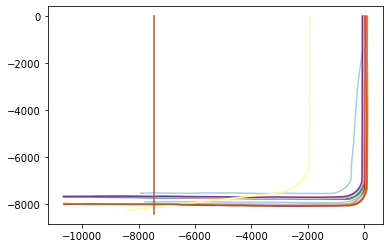

In [36]:
# 2D Matplotlib
import matplotlib.pyplot as plt

#画俯视图 -XY（坐标平面）为例
num_wells = len(well_points)

#从matplotlib 中提取一些颜色
colors = plt.cm.Paired(np.linspace(0,1,num_wells))
for wi in range(num_wells):
    w_name = well_names[wi]
    w_proj_x = well_points[wi][:,1]
    w_proj_y = -well_points[wi][:,2]
    #print(w_name,w_proj_x[0:5],w_proj_y[0:5])

    plt.plot(w_proj_x,w_proj_y,color=colors[wi])

#微地震部分
#画图参考 https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html


plt.show()

In [6]:
# 3D PyVista （可选）
import pyvista as pv
pv.set_plot_theme("document")

In [8]:
#转化井眼轨迹点到pyvista的线
def polyline_from_points(points):
    poly = pv.PolyData()
    poly.points = points
    the_cell = np.arange(0, len(points), dtype=np.int_)
    the_cell = np.insert(the_cell, 0, len(points))
    poly.lines = the_cell
    return poly

In [9]:
#从matplotlib 中提取一些颜色
n = 16
colors = plt.cm.Paired(np.linspace(0,1,n))

#Plot 画井眼轨迹部分
p = pv.Plotter()
well_tubes = {}
for wi in range(len(well_points)):
    #print(f'Well {wi+1}')
    
    #点变成线
    polyline = polyline_from_points(well_points[wi])
    
    #线变成管
    tube = polyline.tube(radius=25)
    well_tubes[well_names[wi]] = tube

    p.add_mesh(tube,color=colors[wi])


#Plot 微地震部分
#参考：https://docs.pyvista.org/examples/00-load/wrap-trimesh.html#sphx-glr-examples-00-load-wrap-trimesh-py
#。。。
microsemesics = {}


p.show(jupyter_backend='panel')

BokehModel(combine_events=True, render_bundle={'docs_json': {'bdf3ab8b-4b98-4491-aa2a-d4580cb61fff': {'defs': …

In [10]:
#导出到Paraview
blocks = pv.MultiBlock(well_tubes)
blocks.save('Wellbore.vtm')

blocks = pv.MultiBlock(well_tubes)
blocks.save('Wellbore.vtm')